## GTNNWR Case--spatial and temporal distribution of key nutrients in coastal waters

### Case Introduction 

- A spatiotemporal-intelligent method for fine-scale retrieval of DSi in coastal seas  
This case shows a spatiotemporally weighted intelligent method acquired high-resolution and long-term distributions of coastal dissolved silicate (DSi). Fine-scale DSi changes and influences driven by biological and physical factors were observed and revealed in coastal seas.  


###  Case Background

The migration of dissolved silicate (DSi) from land to coastal environments is an important component of the global biogeochemical cycle. Due to the strong land-ocean interaction in coastal waters, the spatial distribution of coastal DSi exhibits irregular characteristics (influenced by land input and ocean terrain), and the time changes rapidly with brief periodic fluctuations (influenced by biological effects and ocean currents). However, due to the immaturity of spatiotemporal modeling and the low resolution of data sampling, current research on coastal DSi typically depicts its rough changes with spatial and seasonal temporal resolutions of hundreds of kilometers. Therefore, this project will combine advanced spatiotemporal analysis models and high-resolution datasets to analyze changes in the distribution of offshore DSi at higher spatiotemporal resolutions.
> [Qi, J., Du, Z., Wu, S., Chen, Y., & Wang, Y. (2023). A spatiotemporally weighted intelligent method for exploring fine-scale distributions of surface dissolved silicate in coastal seas. Science of The Total Environment , 886, 163981.  ](https://doi.org/10.1016/j.scitotenv.2023.163981)  

### Data used
- The DSi dataset of Zhejiang offshore surface from 2010 to 2018 (obtained by matching the MODIS remote sensing dataset with the dissolved silicate site dataset on the offshore surface).

### Case Process 
- Dependency Library Installation 
- Dataset Import 
- Model Settings 
- Model Training 
- Model Result Output

### Schematic diagram of the research area

![Image Name](https://mydde.deep-time.org/s3/static-files/upload/upload/1695121607986_1.jpg)  


#### Install the gnnwr model library 
The gnnwr model library includes the GNNWR model and GTNNWR model, supporting high-precision spatiotemporal non-stationary and complex nonlinear modeling. Its installation method is as follows:
```bash  
pip install gnnwr  
```

In [ ]:
!pip install gnnwr

#### Dependency Library Installation

In [2]:
import os
import sys
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from src.gnnwr.datasets import init_dataset
from src.gnnwr.models import GTNNWR

In [3]:
data = pd.read_csv('../data/demo_data_gtnnwr.csv')

#### Dataset Import   
- Through the "init_dataset()" function, users can set input data, test set size, validation set size, independent variable, dependent variable, spatial attribute, time attribute, numbered column, random seed, and batch size.
- The initialized dataset can be saved using the "save()" method and the read method can be used to "read()" the saved results.

In [4]:
data["id"] = np.arange(len(data))
train_dataset, val_dataset, test_dataset = init_dataset(data=data,
                                                        test_ratio=0.15,
                                                        valid_ratio=0.1,
                                                        x_column=['refl_b01', 'refl_b02',\
                                                        'refl_b03','refl_b04','refl_b05',\
                                                        'refl_b07'],
                                                        y_column=['SiO3'],
                                                        spatial_column=['proj_x', 'proj_y'],
                                                        temp_column=['day'],
                                                        id_column=['id'],
                                                        sample_seed=48,
                                                        batch_size=128)

x_min:[ 1.  0.  7. 58.  0.  7.];  x_max:[7307. 7092. 7179. 7808. 8596. 4352.]
y_min:[0.029];  y_max:[7.82]


#### Model Settings  
- The model accepts parameters such as training set, validation set, test set, hidden layer, and optimizer, and can set network structure, optimizer type, and learning rate adjustment method.
- The "add_graph()" function can be used to save the graph structure (chart) of the model, which can be viewed in Tensorboard.

In [ ]:
gtnnwr = GTNNWR(train_dataset, val_dataset, test_dataset, [[3], [2048, 512, 256,32]],optimizer='Adam')
gtnnwr.add_graph()

Add Graph Successfully


#### Model Training  
- 使用run方法可以进行模型训练，并可以设置训练步长和早停步长。

In [ ]:
gtnnwr.run(50000,8000,400)

  1%|          | 401/50000 [00:56<1:58:20,  6.98it/s]


Epoch:  400
learning rate:  0.010002467378551953
Train Loss:  0.1255305020617923
Train R2: 0.78199
Train RMSE: 0.35430
Train AIC: 4501.76112
Train AICc: 4502.16650
Valid Loss:  0.16382570564746857
Valid R2: 0.69260 



  2%|▏         | 801/50000 [01:52<1:53:58,  7.19it/s]


Epoch:  800
learning rate:  0.06296881331438126
Train Loss:  0.5232906349611046
Train R2: 0.09119
Train RMSE: 0.72339
Train AIC: 1005.22867
Train AICc: 1005.52167
Valid Loss:  86464.3046875
Valid R2: -162238.70720 



  2%|▏         | 1201/50000 [02:48<1:54:22,  7.11it/s]


Epoch:  1200
learning rate:  0.012767813975819988
Train Loss:  0.5024655883163952
Train R2: 0.12736
Train RMSE: 0.70885
Train AIC: 597.64678
Train AICc: 597.96301
Valid Loss:  250376.53125
Valid R2: -469799.95529 



  3%|▎         | 1601/50000 [03:44<1:52:11,  7.19it/s]


Epoch:  1600
learning rate:  0.09730404743948165
Train Loss:  0.5068534026010555
Train R2: 0.11974
Train RMSE: 0.71194
Train AIC: 679.65283
Train AICc: 680.29150
Valid Loss:  0.4757862091064453
Valid R2: 0.10725 



  4%|▍         | 2001/50000 [04:40<1:51:27,  7.18it/s]


Epoch:  2000
learning rate:  0.08591893798619905
Train Loss:  0.5083035415977764
Train R2: 0.11722
Train RMSE: 0.71295
Train AIC: 858.49322
Train AICc: 859.09406
Valid Loss:  0.4586660861968994
Valid R2: 0.13937 



  5%|▍         | 2401/50000 [05:36<1:50:39,  7.17it/s]


Epoch:  2400
learning rate:  0.06795629693772413
Train Loss:  0.5134656397729052
Train R2: 0.10826
Train RMSE: 0.71657
Train AIC: 950.00304
Train AICc: 950.97614
Valid Loss:  0.45549067854881287
Valid R2: 0.14533 



  6%|▌         | 2801/50000 [06:32<1:50:21,  7.13it/s]


Epoch:  2800
learning rate:  0.0472374016963461
Train Loss:  0.5043769174730955
Train R2: 0.12404
Train RMSE: 0.71020
Train AIC: 589.59358
Train AICc: 589.91162
Valid Loss:  0.4530961513519287
Valid R2: 0.14982 



  6%|▋         | 3201/50000 [07:28<1:48:41,  7.18it/s]


Epoch:  3200
learning rate:  0.0281698806265473
Train Loss:  0.5072223623629463
Train R2: 0.11910
Train RMSE: 0.71220
Train AIC: 740.63139
Train AICc: 741.24493
Valid Loss:  0.45214977860450745
Valid R2: 0.15160 



  7%|▋         | 3601/50000 [08:24<1:47:14,  7.21it/s]


Epoch:  3600
learning rate:  0.014810057471872154
Train Loss:  0.501368857547473
Train R2: 0.12926
Train RMSE: 0.70807
Train AIC: 621.84235
Train AICc: 622.33295
Valid Loss:  0.4516318142414093
Valid R2: 0.15257 



  8%|▊         | 4001/50000 [09:20<1:46:28,  7.20it/s]


Epoch:  4000
learning rate:  0.010000030461738542
Train Loss:  0.5025322817101463
Train R2: 0.12724
Train RMSE: 0.70890
Train AIC: 585.27058
Train AICc: 585.69946
Valid Loss:  0.4519169330596924
Valid R2: 0.15203 



  9%|▉         | 4401/50000 [10:15<1:46:49,  7.11it/s]


Epoch:  4400
learning rate:  0.09946223674409155
Train Loss:  0.5061482530072123
Train R2: 0.12096
Train RMSE: 0.71144
Train AIC: 849.85411
Train AICc: 850.77063
Valid Loss:  0.4547555446624756
Valid R2: 0.14671 



 10%|▉         | 4801/50000 [11:12<1:45:43,  7.12it/s]


Epoch:  4800
learning rate:  0.09785648056103248
Train Loss:  0.5243051440504125
Train R2: 0.08943
Train RMSE: 0.72409
Train AIC: 1141.42945
Train AICc: 1141.92212
Valid Loss:  0.4701888859272003
Valid R2: 0.11775 



 10%|█         | 5201/50000 [12:08<1:44:02,  7.18it/s]


Epoch:  5200
learning rate:  0.09522129881310896
Train Loss:  0.5063074649911359
Train R2: 0.12069
Train RMSE: 0.71155
Train AIC: 807.25428
Train AICc: 808.84399
Valid Loss:  0.45458388328552246
Valid R2: 0.14703 



 11%|█         | 5601/50000 [13:04<1:42:44,  7.20it/s]


Epoch:  5600
learning rate:  0.09161998935921811
Train Loss:  0.5080620447436449
Train R2: 0.11764
Train RMSE: 0.71278
Train AIC: 623.98591
Train AICc: 624.53680
Valid Loss:  0.4485916793346405
Valid R2: 0.15827 



 12%|█▏        | 6001/50000 [13:59<1:42:16,  7.17it/s]


Epoch:  6000
learning rate:  0.08713905673660349
Train Loss:  0.5077448078994011
Train R2: 0.11819
Train RMSE: 0.71256
Train AIC: 663.86353
Train AICc: 664.22479
Valid Loss:  0.4490242004394531
Valid R2: 0.15746 



 13%|█▎        | 6401/50000 [14:55<1:41:58,  7.13it/s]


Epoch:  6400
learning rate:  0.08188613429582894
Train Loss:  0.5196859599126787
Train R2: 0.09745
Train RMSE: 0.72089
Train AIC: 938.91649
Train AICc: 939.61743
Valid Loss:  0.45926737785339355
Valid R2: 0.13824 



 14%|█▎        | 6801/50000 [15:51<1:40:29,  7.16it/s]


Epoch:  6800
learning rate:  0.0759873988152951
Train Loss:  0.5057666090599531
Train R2: 0.12163
Train RMSE: 0.71117
Train AIC: 753.67812
Train AICc: 754.30493
Valid Loss:  0.45713624358177185
Valid R2: 0.14224 



 14%|█▍        | 7201/50000 [16:47<1:40:46,  7.08it/s]


Epoch:  7200
learning rate:  0.0695845396970374
Train Loss:  0.5126442756804328
Train R2: 0.10968
Train RMSE: 0.71599
Train AIC: 956.35033
Train AICc: 956.58008
Valid Loss:  0.4589979946613312
Valid R2: 0.13875 



 15%|█▌        | 7601/50000 [17:43<1:38:37,  7.17it/s]


Epoch:  7600
learning rate:  0.06283135554463397
Train Loss:  0.5051916419331584
Train R2: 0.12263
Train RMSE: 0.71077
Train AIC: 544.29472
Train AICc: 544.18353
Valid Loss:  0.46397000551223755
Valid R2: 0.12942 



 16%|█▌        | 8001/50000 [18:39<1:37:40,  7.17it/s]


Epoch:  8000
learning rate:  0.05589005987444715
Train Loss:  0.5333090650170383
Train R2: 0.07379
Train RMSE: 0.73028
Train AIC: 1381.64953
Train AICc: 1380.19617
Valid Loss:  0.847737729549408
Valid R2: -0.59068 



 17%|█▋        | 8395/50000 [19:34<1:37:01,  7.15it/s]

Best_r2: 0.7150783977046153


#### Model Result Output  
- Using 'result()' can obtain the basic information of the optimal model and the running results of the model on the test set
- Using 'reg_result()' can save the running results of the optimal model on the entire dataset, including the spatiotemporal non-stationary weights calculated by the model.

In [ ]:
gtnnwr.result()

Test Loss:  0.17196375131607056  Test R2:  0.6857331269883893
--------------------Result Table--------------------

Model Name:           | GTNNWR_20230921-010255
Model Structure:      |
 DataParallel(
  (module): Sequential(
    (0): STPNN(
      (activate_func): ReLU()
      (fc): Sequential(
        (stpnn_full0): Linear(in_features=2, out_features=3, bias=True)
        (stpnn_batc0): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (stpnn_acti0): ReLU()
        (stpnn_drop0): Dropout(p=0.2, inplace=False)
        (full1): Linear(in_features=3, out_features=1, bias=True)
        (acti1): ReLU()
      )
    )
    (1): SWNN(
      (activate_func): PReLU(num_parameters=1)
      (fc): Sequential(
        (swnn_full0): Linear(in_features=2219, out_features=2048, bias=True)
        (swnn_batc0): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swnn_acti0): PReLU(num_parameters=1)
        (swnn_drop0): Dropout(

In [ ]:
gtnnwr.reg_result('./gtnnwr_result.csv')

#### Analysis of model results
- The output results of the model can be imported and analyzed through drawing images and other methods.

In [ ]:
result_data = pd.read_csv('./gtnnwr_result.csv')
result_data['id'] = result_data['id'].astype(np.int64)
columns = result_data.columns.copy().tolist()
columns[-2] = 'Pred_SiO3'
result_data.columns = columns
result_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901 entries, 0 to 2900
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   weight_refl_b01  2901 non-null   float64
 1   weight_refl_b02  2901 non-null   float64
 2   weight_refl_b03  2901 non-null   float64
 3   weight_refl_b04  2901 non-null   float64
 4   weight_refl_b05  2901 non-null   float64
 5   weight_refl_b07  2901 non-null   float64
 6   bias             2901 non-null   float64
 7   Pred_SiO3        2901 non-null   float64
 8   id               2901 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 204.1 KB


In [ ]:
data.set_index('id',inplace=True)
result_data.set_index('id',inplace=True)

In [ ]:
ana_data = result_data.join(data)
ana_data

,weight_refl_b01,weight_refl_b02,weight_refl_b03,weight_refl_b04,weight_refl_b05,weight_refl_b07,bias,Pred_SiO3,refl_b01,refl_b02,refl_b03,refl_b04,refl_b05,refl_b07,proj_x,proj_y,day,SiO3
id,,,,,,,,,,,,,,,,,,
2003,3.042564,-0.031064,0.421716,-2.721028,1.676011,-1.523341,1.143124,1.203173,1126,599,1236,1433,359,193,627064.3528,3103361.192,71,1.0800
1271,3.208957,-0.274934,0.185130,-2.930902,1.403559,-1.274697,1.019443,1.189070,1273,771,740,1072,219,112,683094.5885,3221184.137,132,0.7690
62,2.905780,0.197722,0.444537,-3.064213,1.698047,-1.509520,1.272132,1.304755,884,321,725,1024,133,54,735283.8788,3305543.460,250,1.1900
1697,2.587515,-0.970539,0.032984,-1.805138,1.104720,-0.828405,0.706159,0.709020,441,322,595,582,271,136,722640.1815,3179444.766,148,0.7448
596,2.436733,-1.554515,0.100611,-0.458050,1.251378,-0.712211,0.377116,0.407960,233,42,17,453,148,225,683961.0460,3152123.113,218,0.2770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,2.739470,-0.606008,0.129091,-2.285093,1.244203,-1.040607,0.884272,0.889137,846,734,854,884,541,422,754823.0668,3321975.813,148,0.8490
22,2.502609,-1.325996,-0.070184,-1.360116,0.988490,-0.640914,0.533587,0.480670,162,180,259,544,632,409,767853.4267,3405004.928,282,0.6680
331,3.041888,-0.068894,0.329034,-2.846477,1.557552,-1.401787,1.143297,1.083172,744,384,775,1066,319,282,683165.2412,3283556.766,203,1.2800


R2: 0.79368150398148


<Figure size 432x288 with 1 Axes>
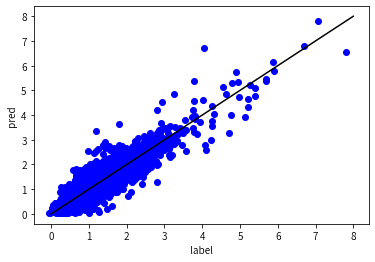

In [ ]:
from sklearn.metrics import r2_score as r2
print('R2:',r2(ana_data['Pred_SiO3'],ana_data['SiO3']))
import matplotlib.pyplot as plt
plt.scatter(ana_data['Pred_SiO3'],ana_data['SiO3'],color='b')
plt.plot([i for i in range(9)],[i for i in range(9)],color='black')
plt.xlabel('label')
plt.ylabel('pred')
plt.show()

<Figure size 648x648 with 1 Axes>
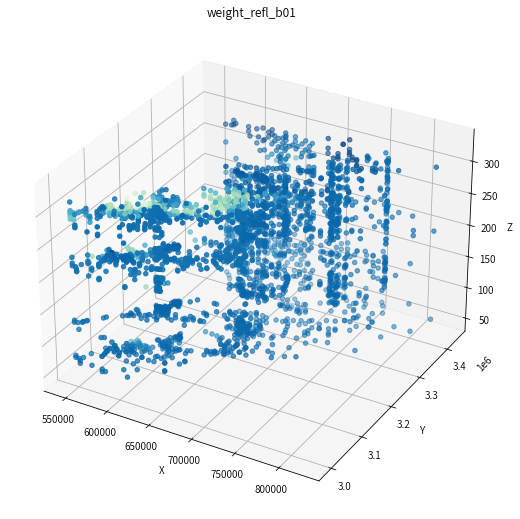

<Figure size 648x648 with 1 Axes>
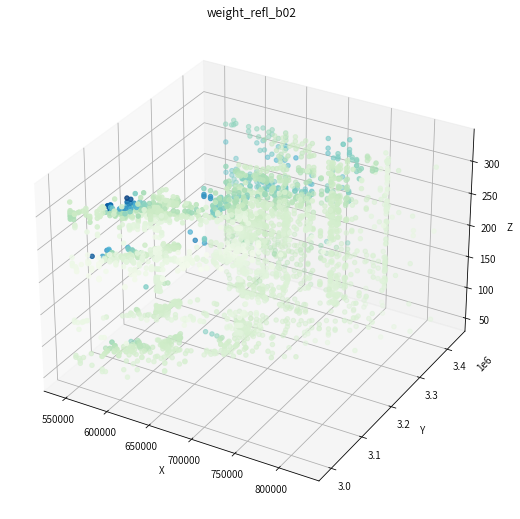

<Figure size 648x648 with 1 Axes>
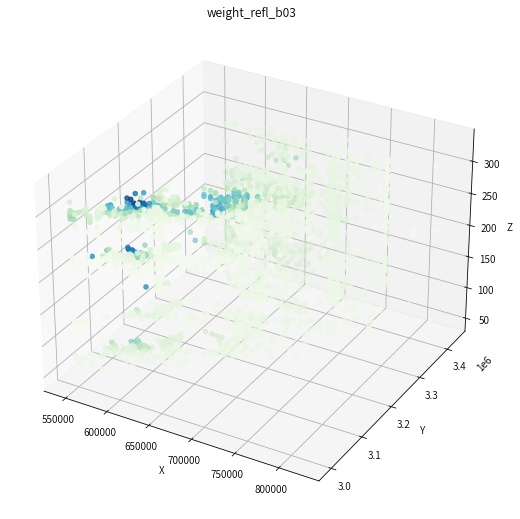

<Figure size 648x648 with 1 Axes>
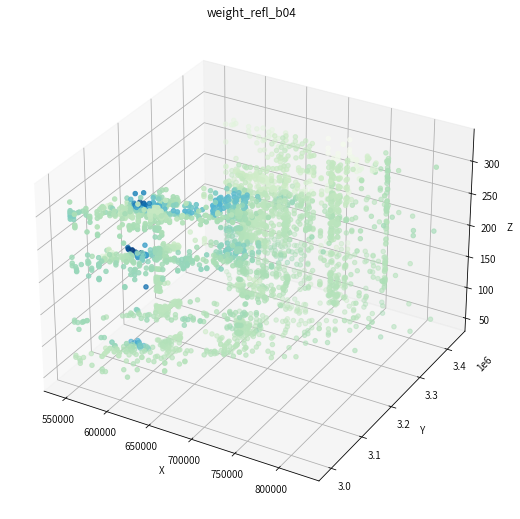

<Figure size 648x648 with 1 Axes>
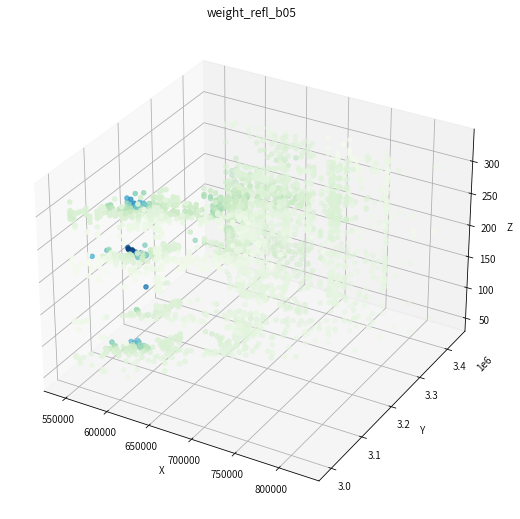

<Figure size 648x648 with 1 Axes>
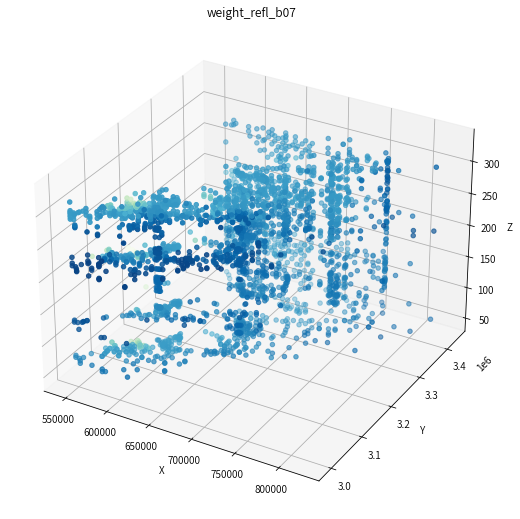

<Figure size 648x648 with 1 Axes>
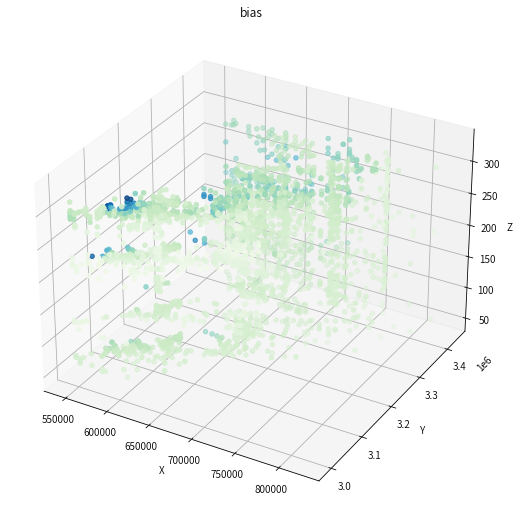

In [ ]:
def plot_weight(name):
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(ana_data['proj_x'],ana_data['proj_y'],ana_data['day'],c=ana_data[name],cmap='GnBu')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(name)
for i in [1,2,3,4,5,7]:
    plot_weight('weight_refl_b0'+str(i))
plot_weight('bias')